In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [40]:
df_SITP=pd.read_csv('9. Base de las rutas de transporte e Bogotá (2021)- Paraderos Zonales SITP.csv',encoding='latin1')

In [41]:
df_SITP["Nombre_Localidad"]=df_SITP["localidad_"]

In [42]:
df_SITP["Nombre_Zona"]=df_SITP["zona_parad"]

In [43]:
df_SITP

,Shape *,OBJECTID_1,objectid,cenefa_par,mdoulo_par,zona_parad,nombre_par,direccion_,localidad_,consola_pa,panel_para,audio_para,Latitud,Longitud,Nombre_Localidad,Nombre_Zona
0,Point,1,57288,001A00,A,0,C.C. Iserra 100,AC 100 - KR 54,12,AC 100 - KR 54 (001A00),AC 100 - KR 54,Avenida Calle 100 Carrera 54,4.688481,-74.063971,12,0
1,Point,2,57289,001A01,A,1,Br. Rincón del Chicó,AC 100 - KR 13,1,AC 100 - KR 13 (001A01),AC 100 - KR 13,Avenida Calle 100 Carrera 13,4.684091,-74.045914,1,1
2,Point,3,57290,001A02,A,2,Gimnasio Iragua,AV. Boyacá - AC 170,11,AV. Boyacá - AC 170 (001A02),AV. Boyacá - AC 170,Avenida Boyacá Avenida Calle 170,4.759867,-74.06635,11,2
3,Point,4,57291,001A03,A,3,Br. Julio Flórez,AC 100 - KR 66A,11,AC 100 - KR 66A (001A03),AC 100 - KR 66A,Avenida Calle 100 Carrera 66 A,4.689504,-74.071439,11,3
4,Point,5,57292,001A04,A,4,Avenida Calle 80,AK 68 - CL 79D,12,AK 68 - CL 79D (001A04),AK 68 - CL 79D,Avenida Carrera 68 Calle 79 D,4.682626,-74.080392,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,Point,7604,64891,PDM-TM,-,0,Plaza de la Democracia,Plaza de la Democracia,0,Plaza de la Democracia (PDM-TM),Plaza de la Democracia,Plaza de la democracia,4.626006,-74.080301,0,0
7604,Point,7605,64892,QPA-TM,-,0,Quinta Paredes,Quinta Paredes,0,Quinta Paredes (QPA-TM),Quinta Paredes,Quinta paredes,4.637602,-74.09315,0,0
7605,Point,7606,64893,ROJ-TM,-,0,AV. Rojas,AV. Rojas,0,AV. Rojas (ROJ-TM),AV. Rojas,Avenida Rojas,4.662016,-74.108786,0,0
7606,Point,7607,64894,SGR-TM,-,0,Salitre el Greco,Salitre el Greco,0,Salitre el Greco (SGR-TM),Salitre el Greco,Salitre el Greco,4.650884,-74.101665,0,0


In [44]:
dic_Localidades={0:'Teusaquillo',
                1:'Usaquén',
                2:'Chapinero',
                3:'Santa Fe',
                4:'San Cristobal',
                5:'Usme',
                6:'Tunjuelito',
                7:'Bosa',
                8:'Kennedy',
                9:'Fontibón',
                10:'Engativá',
                11:'Suba',
                12:'Barrios Unidos',
                13:'Teusaquillo',
                14:'Los Mártires',
                15:'Antonio Nariño',
                16:'Puente Aranda',
                17:'La Candelaria',
                18:'Rafael Uribe Uribe',
                19:'Ciudad Bolivar'         
}

In [45]:
df_SITP["Nombre_Localidad"]=df_SITP["Nombre_Localidad"].replace(dic_Localidades)
df_SITP

,Shape *,OBJECTID_1,objectid,cenefa_par,mdoulo_par,zona_parad,nombre_par,direccion_,localidad_,consola_pa,panel_para,audio_para,Latitud,Longitud,Nombre_Localidad,Nombre_Zona
0,Point,1,57288,001A00,A,0,C.C. Iserra 100,AC 100 - KR 54,12,AC 100 - KR 54 (001A00),AC 100 - KR 54,Avenida Calle 100 Carrera 54,4.688481,-74.063971,Barrios Unidos,0
1,Point,2,57289,001A01,A,1,Br. Rincón del Chicó,AC 100 - KR 13,1,AC 100 - KR 13 (001A01),AC 100 - KR 13,Avenida Calle 100 Carrera 13,4.684091,-74.045914,Usaquén,1
2,Point,3,57290,001A02,A,2,Gimnasio Iragua,AV. Boyacá - AC 170,11,AV. Boyacá - AC 170 (001A02),AV. Boyacá - AC 170,Avenida Boyacá Avenida Calle 170,4.759867,-74.06635,Suba,2
3,Point,4,57291,001A03,A,3,Br. Julio Flórez,AC 100 - KR 66A,11,AC 100 - KR 66A (001A03),AC 100 - KR 66A,Avenida Calle 100 Carrera 66 A,4.689504,-74.071439,Suba,3
4,Point,5,57292,001A04,A,4,Avenida Calle 80,AK 68 - CL 79D,12,AK 68 - CL 79D (001A04),AK 68 - CL 79D,Avenida Carrera 68 Calle 79 D,4.682626,-74.080392,Barrios Unidos,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,Point,7604,64891,PDM-TM,-,0,Plaza de la Democracia,Plaza de la Democracia,0,Plaza de la Democracia (PDM-TM),Plaza de la Democracia,Plaza de la democracia,4.626006,-74.080301,Teusaquillo,0
7604,Point,7605,64892,QPA-TM,-,0,Quinta Paredes,Quinta Paredes,0,Quinta Paredes (QPA-TM),Quinta Paredes,Quinta paredes,4.637602,-74.09315,Teusaquillo,0
7605,Point,7606,64893,ROJ-TM,-,0,AV. Rojas,AV. Rojas,0,AV. Rojas (ROJ-TM),AV. Rojas,Avenida Rojas,4.662016,-74.108786,Teusaquillo,0
7606,Point,7607,64894,SGR-TM,-,0,Salitre el Greco,Salitre el Greco,0,Salitre el Greco (SGR-TM),Salitre el Greco,Salitre el Greco,4.650884,-74.101665,Teusaquillo,0


In [46]:
df_SITP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Shape *           7608 non-null   object
 1   OBJECTID_1        7608 non-null   int64 
 2   objectid          7608 non-null   int64 
 3   cenefa_par        7608 non-null   object
 4   mdoulo_par        7608 non-null   object
 5   zona_parad        7608 non-null   int64 
 6   nombre_par        7608 non-null   object
 7   direccion_        7608 non-null   object
 8   localidad_        7608 non-null   int64 
 9   consola_pa        7608 non-null   object
 10  panel_para        7608 non-null   object
 11  audio_para        7608 non-null   object
 12  Latitud           7608 non-null   object
 13  Longitud          7608 non-null   object
 14  Nombre_Localidad  7608 non-null   object
 15  Nombre_Zona       7608 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 951.1+ KB


In [47]:
df_SITP.groupby(['Nombre_Localidad'])['Nombre_Localidad'].count().sort_values(ascending=False)

Nombre_Localidad
Kennedy               936
Suba                  825
Engativá              775
Usaquén               703
Ciudad Bolivar        574
Bosa                  499
Fontibón              392
San Cristobal         390
Puente Aranda         374
Usme                  329
Chapinero             320
Rafael Uribe Uribe    302
Teusaquillo           275
Barrios Unidos        218
Santa Fe              208
Tunjuelito            189
Los Mártires          166
Antonio Nariño        104
La Candelaria          29
Name: Nombre_Localidad, dtype: int64

<AxesSubplot:title={'center':'#Stations per Localty'}, ylabel='Nombre_Localidad'>

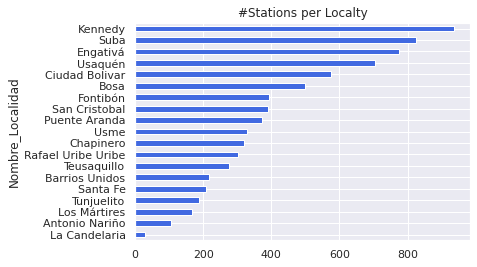

In [48]:
df_SITP.groupby(['Nombre_Localidad'])['Nombre_Localidad'].count().sort_values(ascending=True).plot.barh(
                                                                                    title="#Stations per Localty",
                                                                                     ylabel="Troncal", 
                                                                                     color="royalblue")

In [49]:
dic_zonas={0:'Teusaquillo',
                1:'Usaquén',
                2:'Suba Oriental',
                3:'Suba Centro',
                4:'Calle 80',
                5:'Engativa',
                6:'Fontibón',
                7:'Tintal-Zona Franca',
                8:'Kennedy',
                9:'Bosa',
                10:'Perdomo',
                11:'Ciudad Bolivar',
                12:'Usme',
                13:'San Cristobal',        
}

In [50]:
df_SITP["Nombre_Zona"]=df_SITP["Nombre_Zona"].replace(dic_zonas)
df_SITP

,Shape *,OBJECTID_1,objectid,cenefa_par,mdoulo_par,zona_parad,nombre_par,direccion_,localidad_,consola_pa,panel_para,audio_para,Latitud,Longitud,Nombre_Localidad,Nombre_Zona
0,Point,1,57288,001A00,A,0,C.C. Iserra 100,AC 100 - KR 54,12,AC 100 - KR 54 (001A00),AC 100 - KR 54,Avenida Calle 100 Carrera 54,4.688481,-74.063971,Barrios Unidos,Teusaquillo
1,Point,2,57289,001A01,A,1,Br. Rincón del Chicó,AC 100 - KR 13,1,AC 100 - KR 13 (001A01),AC 100 - KR 13,Avenida Calle 100 Carrera 13,4.684091,-74.045914,Usaquén,Usaquén
2,Point,3,57290,001A02,A,2,Gimnasio Iragua,AV. Boyacá - AC 170,11,AV. Boyacá - AC 170 (001A02),AV. Boyacá - AC 170,Avenida Boyacá Avenida Calle 170,4.759867,-74.06635,Suba,Suba Oriental
3,Point,4,57291,001A03,A,3,Br. Julio Flórez,AC 100 - KR 66A,11,AC 100 - KR 66A (001A03),AC 100 - KR 66A,Avenida Calle 100 Carrera 66 A,4.689504,-74.071439,Suba,Suba Centro
4,Point,5,57292,001A04,A,4,Avenida Calle 80,AK 68 - CL 79D,12,AK 68 - CL 79D (001A04),AK 68 - CL 79D,Avenida Carrera 68 Calle 79 D,4.682626,-74.080392,Barrios Unidos,Calle 80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,Point,7604,64891,PDM-TM,-,0,Plaza de la Democracia,Plaza de la Democracia,0,Plaza de la Democracia (PDM-TM),Plaza de la Democracia,Plaza de la democracia,4.626006,-74.080301,Teusaquillo,Teusaquillo
7604,Point,7605,64892,QPA-TM,-,0,Quinta Paredes,Quinta Paredes,0,Quinta Paredes (QPA-TM),Quinta Paredes,Quinta paredes,4.637602,-74.09315,Teusaquillo,Teusaquillo
7605,Point,7606,64893,ROJ-TM,-,0,AV. Rojas,AV. Rojas,0,AV. Rojas (ROJ-TM),AV. Rojas,Avenida Rojas,4.662016,-74.108786,Teusaquillo,Teusaquillo
7606,Point,7607,64894,SGR-TM,-,0,Salitre el Greco,Salitre el Greco,0,Salitre el Greco (SGR-TM),Salitre el Greco,Salitre el Greco,4.650884,-74.101665,Teusaquillo,Teusaquillo


In [51]:
df_SITP.groupby(['Nombre_Zona'])['Nombre_Zona'].count().sort_values(ascending=False)

Nombre_Zona
Teusaquillo           891
Usaquén               709
Bosa                  689
Kennedy               686
Ciudad Bolivar        572
Engativa              545
Usme                  539
Suba Centro           536
San Cristobal         512
Tintal-Zona Franca    439
Fontibón              423
Calle 80              386
Perdomo               359
Suba Oriental         322
Name: Nombre_Zona, dtype: int64

<AxesSubplot:title={'center':'#Stations per Zona'}, ylabel='Nombre_Zona'>

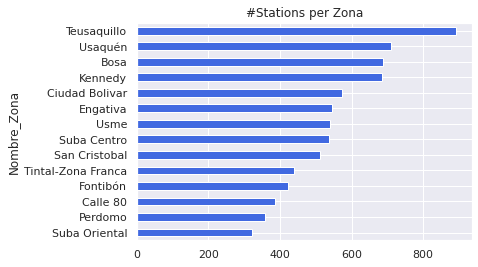

In [53]:
df_SITP.groupby(['Nombre_Zona'])['Nombre_Zona'].count().sort_values(ascending=True).plot.barh(
                                                                                    title="#Stations per Zona",
                                                                                     ylabel="Troncal", 
                                                                                     color="royalblue")